In [1]:
# First let's import the required packages for this project
# You can do this all now or as you need them
import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import matplotlib
plt.style.use('ggplot')
from matplotlib.pyplot import figure

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12,8)

df = pd.read_csv(r'C:\Users\Gangaraj\Downloads\movies.csv')



In [2]:
df.head()


,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0


In [3]:
# Checking if any misiing data
for col in df.columns:
    pct_missing = np.mean(df[col].isnull())
    print('{} - {}%'.format(col,pct_missing))
df.isnull()

name - 0.0%
rating - 0.010041731872717789%
genre - 0.0%
year - 0.0%
released - 0.0002608242044861763%
score - 0.0003912363067292645%
votes - 0.0003912363067292645%
director - 0.0%
writer - 0.0003912363067292645%
star - 0.00013041210224308815%
country - 0.0003912363067292645%
budget - 0.2831246739697444%
gross - 0.02464788732394366%
company - 0.002217005738132499%
runtime - 0.0005216484089723526%


,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7663,False,True,False,False,False,False,False,False,False,False,False,False,True,True,False
7664,False,True,False,False,False,False,False,False,False,False,False,True,True,False,False
7665,False,True,False,False,False,False,False,False,False,False,False,False,True,False,True
7666,False,True,False,False,False,True,True,False,False,False,False,False,True,True,False


In [4]:
#Remove null values
df.isnull().sum()
df.shape
df.dropna(how = 'any',inplace = True)
df.shape
df.isnull().sum()
# Now we cleared all the null values

name        0
rating      0
genre       0
year        0
released    0
score       0
votes       0
director    0
writer      0
star        0
country     0
budget      0
gross       0
company     0
runtime     0
dtype: int64

In [5]:
# Checking Data types
df.dtypes
#changing data type of columns
df['budget'] = df['budget'].astype('int64')
df['gross'] = df['gross'].astype('int64')


In [6]:
df['right_year'] = df['released'].astype(str).str[-5:]

In [7]:

pd.set_option('display.max_rows', None)
df = df.sort_values(by=['gross'],inplace =False, ascending=False)

In [8]:
# Drop any Duplicates
df_company = df['company'].drop_duplicates().sort_values(ascending = False)


7129                                              thefyzz
5664                                          micro_scope
4007                                             i5 Films
6793                                           i am OTHER
6420                                                 erbp
3776                                       double A Films
3330                          Zucker Brothers Productions
520                                      Zoetrope Studios
2213                                   Zeta Entertainment
3698                              Zentropa Entertainments
1180                                 Zenith Entertainment
5180                                      Zazen Produções
1321                             Zanuck/Brown Productions
1329                          Zacharias-Buhai Productions
789                             Young Sung Production Co.
5125                           Young Hannibal Productions
5499                                          Yellow Bird
4618          

In [9]:
df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,right_year
5445,Avatar,PG-13,Action,2009,"December 18, 2009 (United States)",7.8,1100000.0,James Cameron,James Cameron,Sam Worthington,United States,237000000,2847246203,Twentieth Century Fox,162.0,ates)
7445,Avengers: Endgame,PG-13,Action,2019,"April 26, 2019 (United States)",8.4,903000.0,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,356000000,2797501328,Marvel Studios,181.0,ates)
3045,Titanic,PG-13,Drama,1997,"December 19, 1997 (United States)",7.8,1100000.0,James Cameron,James Cameron,Leonardo DiCaprio,United States,200000000,2201647264,Twentieth Century Fox,194.0,ates)
6663,Star Wars: Episode VII - The Force Awakens,PG-13,Action,2015,"December 18, 2015 (United States)",7.8,876000.0,J.J. Abrams,Lawrence Kasdan,Daisy Ridley,United States,245000000,2069521700,Lucasfilm,138.0,ates)
7244,Avengers: Infinity War,PG-13,Action,2018,"April 27, 2018 (United States)",8.4,897000.0,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,321000000,2048359754,Marvel Studios,149.0,ates)


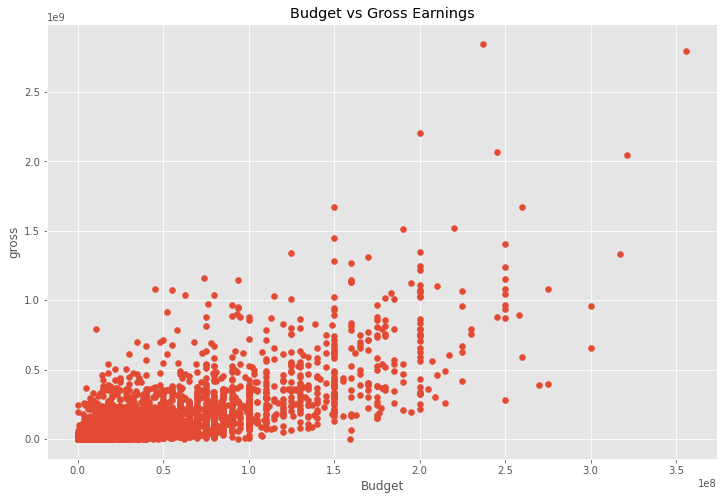

In [10]:
#Visualizing the corelation b/w Budget and Gross
plt.scatter(x=df['budget'], y = df['gross'])
plt.title('Budget vs Gross Earnings')
plt.xlabel('Budget')
plt.ylabel('gross')
plt.show()

<AxesSubplot:xlabel='budget', ylabel='gross'>

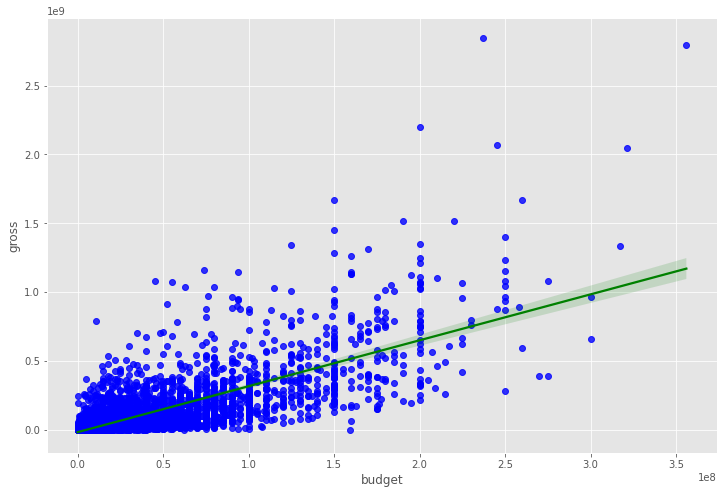

In [11]:
# Using seaborn for Budget vs Gross
sns.regplot(x ='budget', y='gross', data = df,color = 'b', line_kws={'color':'green'})

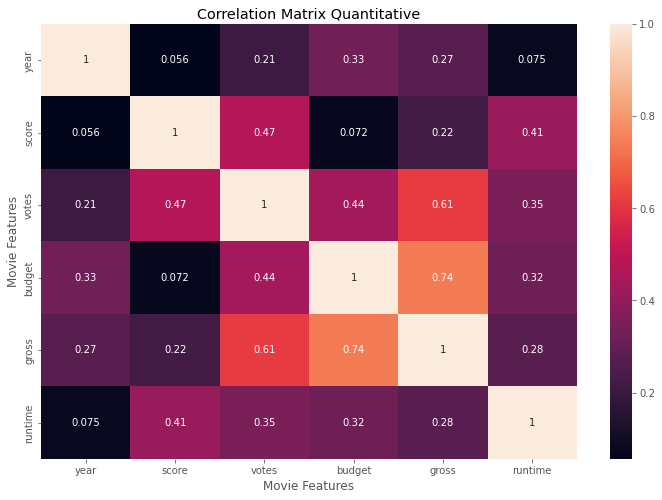

In [12]:
#Checking correlation between fields
correlation_matrix = df.corr(method = 'pearson')
sns.heatmap(correlation_matrix,annot = True)
plt.title('Correlation Matrix')
plt.xlabel('Movie Features')
plt.ylabel('Movie Features')
plt.show()

Now we can see that high correlation between budget and gross


In [13]:
# Make correlation more quantative
df_numerized = df
for col_name in df_numerized.columns:
    if(df_numerized[col_name].dtype == 'object'):
        df_numerized[col_name] = df_numerized[col_name].astype('category')
        df_numerized[col_name] = df_numerized[col_name].cat.codes

df_numerized.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,right_year
5445,386,5,0,2009,527,7.8,1100000.0,785,1263,1534,47,237000000,2847246203,1382,162.0,9
7445,388,5,0,2019,137,8.4,903000.0,105,513,1470,47,356000000,2797501328,983,181.0,9
3045,4909,5,6,1997,534,7.8,1100000.0,785,1263,1073,47,200000000,2201647264,1382,194.0,9
6663,3643,5,0,2015,529,7.8,876000.0,768,1806,356,47,245000000,2069521700,945,138.0,9
7244,389,5,0,2018,145,8.4,897000.0,105,513,1470,47,321000000,2048359754,983,149.0,9


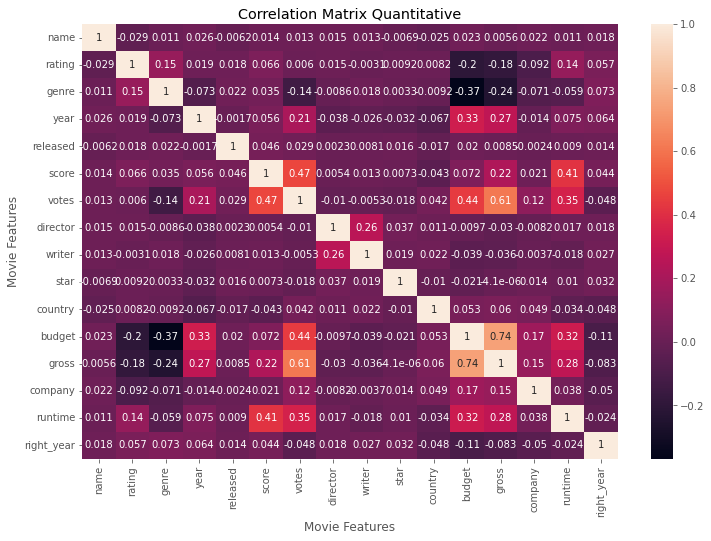

In [14]:
# Now using the same functions for heatmap correlation matrix Quantitative
correlation_matrix = df_numerized.corr(method = 'pearson')
sns.heatmap(correlation_matrix,annot = True)
plt.title('Correlation Matrix Quantitative')
plt.xlabel('Movie Features')
plt.ylabel('Movie Features')
plt.show()

In [15]:
df_numerized.corr.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,right_year
name,1.000000,-0.029234,0.010996,0.025542,-0.006152,0.014450,0.012615,0.015246,0.012880,-0.006882,-0.025490,0.023392,0.005639,0.021697,0.010850,0.018306
rating,-0.029234,1.000000,0.147796,0.019499,0.018083,0.065983,0.006031,0.014656,-0.003149,0.009196,0.008230,-0.203946,-0.181906,-0.092357,0.140792,0.057452
genre,0.010996,0.147796,1.000000,-0.073167,0.022142,0.035106,-0.135990,-0.008553,0.017578,0.003341,-0.009164,-0.368523,-0.244101,-0.071334,-0.059237,0.072875
year,0.025542,0.019499,-0.073167,1.000000,-0.001740,0.056386,0.206021,-0.038354,-0.025908,-0.032157,-0.066748,0.327722,0.274321,-0.014333,0.075077,0.064044
released,-0.006152,0.018083,0.022142,-0.001740,1.000000,0.045874,0.028833,0.002308,0.008072,0.015706,-0.017228,0.019952,0.008501,-0.002407,0.008975,0.013869
score,0.014450,0.065983,0.035106,0.056386,0.045874,1.000000,0.474256,0.005413,0.012843,0.007296,-0.043051,0.072001,0.222556,0.020656,0.414068,0.043846
votes,0.012615,0.006031,-0.135990,0.206021,0.028833,0.474256,1.000000,-0.010376,-0.005316,-0.017638,0.041551,0.439675,0.614751,0.118470,0.352303,-0.047667
director,0.015246,0.014656,-0.008553,-0.038354,0.002308,0.005413,-0.010376,1.000000,0.261735,0.036593,0.011133,-0.009662,-0.029560,-0.008223,0.017433,0.017799
writer,0.012880,-0.003149,0.017578,-0.025908,0.008072,0.012843,-0.005316,0.261735,1.000000,0.018520,0.022488,-0.039466,-0.035885,-0.003697,-0.017561,0.027276
star,-0.006882,0.009196,0.003341,-0.032157,0.015706,0.007296,-0.017638,0.036593,0.018520,1.000000,-0.009990,-0.021473,-0.000004,0.014082,0.010108,0.031511


In [16]:
# Checking for all the fields by matching the field
correlation_mat = df_numerized.corr()
corr_pairs = correlation_mat.unstack()
corr_pairs.head()

name        name          1.000000
            rating       -0.029234
            genre         0.010996
            year          0.025542
            released     -0.006152
            score         0.014450
            votes         0.012615
            director      0.015246
            writer        0.012880
            star         -0.006882
            country      -0.025490
            budget        0.023392
            gross         0.005639
            company       0.021697
            runtime       0.010850
            right_year    0.018306
rating      name         -0.029234
            rating        1.000000
            genre         0.147796
            year          0.019499
            released      0.018083
            score         0.065983
            votes         0.006031
            director      0.014656
            writer       -0.003149
            star          0.009196
            country       0.008230
            budget       -0.203946
            gross   

In [17]:
#sorting the values for better identification
sorted_pairs = corr_pairs.sort_values()
sorted_pairs.head()

genre       budget       -0.368523
budget      genre        -0.368523
genre       gross        -0.244101
gross       genre        -0.244101
rating      budget       -0.203946
budget      rating       -0.203946
gross       rating       -0.181906
rating      gross        -0.181906
genre       votes        -0.135990
votes       genre        -0.135990
right_year  budget       -0.105395
budget      right_year   -0.105395
company     rating       -0.092357
rating      company      -0.092357
gross       right_year   -0.082536
right_year  gross        -0.082536
year        genre        -0.073167
genre       year         -0.073167
            company      -0.071334
company     genre        -0.071334
year        country      -0.066748
country     year         -0.066748
runtime     genre        -0.059237
genre       runtime      -0.059237
right_year  company      -0.049743
company     right_year   -0.049743
country     right_year   -0.048062
right_year  country      -0.048062
votes       right_ye

In [18]:
#Checking which has high correlation after budget and gross
high_corr = sorted_pairs[(sorted_pairs)> 0.5]
high_corr


votes       gross         0.614751
gross       votes         0.614751
budget      gross         0.740247
gross       budget        0.740247
name        name          1.000000
company     company       1.000000
gross       gross         1.000000
budget      budget        1.000000
country     country       1.000000
star        star          1.000000
writer      writer        1.000000
director    director      1.000000
votes       votes         1.000000
score       score         1.000000
released    released      1.000000
year        year          1.000000
genre       genre         1.000000
rating      rating        1.000000
runtime     runtime       1.000000
right_year  right_year    1.000000
dtype: float64

Now we can conclude that budget and gross has the high correlation 
as well as votes and gross has correlation.
So if the movies budget is high then people want to watch movies at first.
aslo if a movie continusouly get positive votes then people are getting more curious to watch that movies.
That is why movie's gross increasing.
